## This notebook looks at exploring the background radial/vignette effect that is present in some images and to see the extent of it

Date and time  2021-10-29 12:17:57.119251
 
/home/selina/Documents/CometAnalysis/notebooks
4Gy 0h-4irrad.bmp
image shape, rows and cols are:  1040 1392


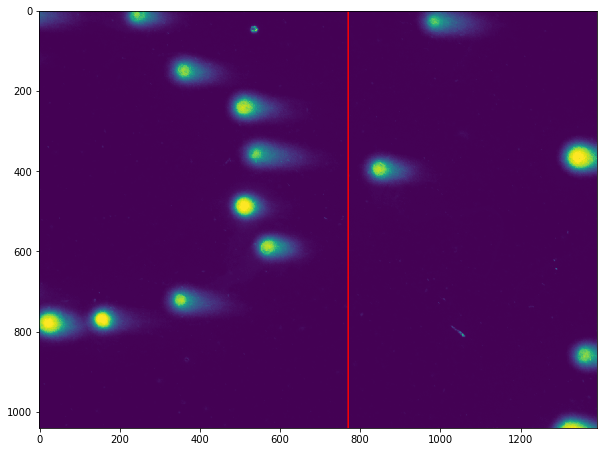

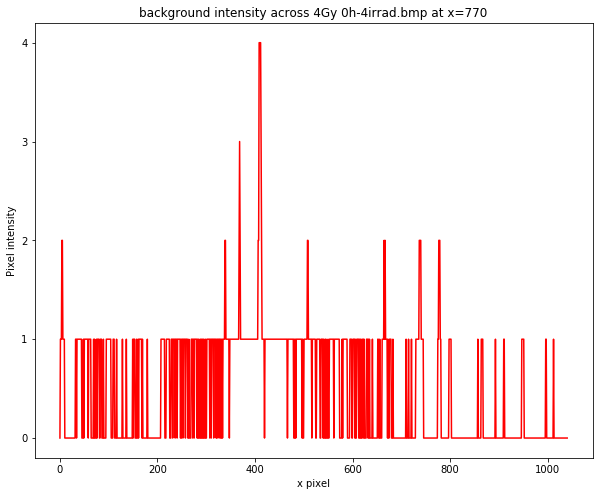

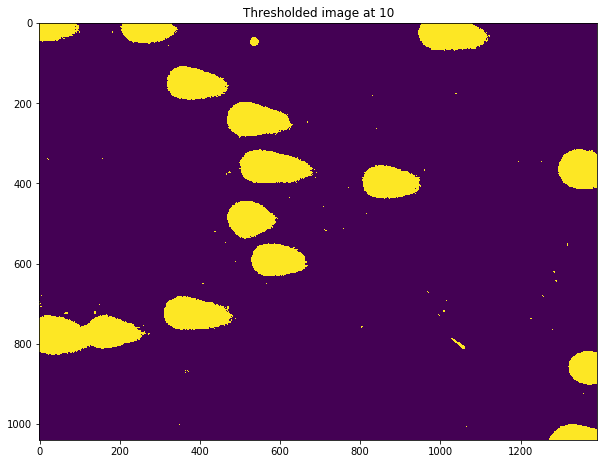

stdev and variance of profile intensities is:  0.5883201187535384 0.34612056213017756
min and max profile intensities are:  0.0 4.0
Percentage increase between edge and central background intensities is:  inf


/home/selina/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:158: RuntimeWarning: divide by zero encountered in double_scalars


In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import glob
import os
import sys
import cv2
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import processing_defs as process
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/4Gy/4Gy 0h-4irrad.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
#
#print("analysing image ", fileList[n])
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates    
nCols = imgRaw.shape[1] # x ccordinates
maxPix = np.amax(imgRaw)
print("image shape, rows and cols are: ", nRows, nCols)
#
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
#
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = process.rgba2rgb(imgRaw)
    imgGrey = process.rgb2grey(imgRGB, 1)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = process.rgb2grey(imgRGB, 1)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgGrey[:, :]
#
thresh = [10, 40]
nThresh = len(thresh)
imgThr = np.zeros((nRows, nCols, nThresh))
imgThr[:, :, 0] = imgArr > thresh[0]
imgThr[:, :, 1] = imgArr > thresh[1]
#
# function to plot line across image
def bckgd_profile(coord, imgArr, filename, x = True):
    '''
    Routine to acquire the background profile from a comet image.
    It first plots the line profile over the image, defined by the coordinate given.
    Then it prints the intesnity profile along that line.
    if x is true it is finding a vertical line, otherwise it is a horizontal line.
    '''
    if x == True:
        nRows = imgArr.shape[0]
        nCols = imgArr.shape[1]
        x_array = np.ones(nRows) * coord
        y_array = np.linspace(0, nRows, nRows)
        fig = plt.figure(figsize = (10,12))
        plt.imshow(imgArr)
        plt.ylim(0, nRows)
        plt.gca().invert_yaxis()
        plt.plot(x_array, y_array, color = 'r')
        plt.show()
        #
        x_profile = np.linspace(0, nRows, nRows)
        y_profile = imgArr[: ,coord]
        ax = plt.figure(figsize = (10,8)).gca()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        plt.title("background intensity across " + str(fileName)+ " at x="+ str(coord))
        plt.xlabel("x pixel")
        plt.ylabel("Pixel intensity")
        plt.plot(x_profile, y_profile, color = 'r')
        plt.show()
              
    else:
        nRows = imgArr.shape[0]
        nCols = imgArr.shape[1]
        x_array = np.linspace(0, nCols, nCols)
        y_array = np.ones(nCols) * coord
        fig = plt.figure(figsize = (10,12))
        plt.imshow(imgArr)
        plt.xlim(0, nCols)
        plt.plot(x_array, y_array, color = 'r')
        plt.show()
        #
        x_profile = np.linspace(0, nCols, nCols)
        y_profile = imgArr[coord,:]
        ax = plt.figure(figsize = (10,8)).gca()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        plt.title("background intensity across " + str(fileName)+ " at y="+ str(coord))
        plt.xlabel("y pixel")
        plt.ylabel("Pixel intensity")
        plt.plot(x_profile, y_profile, color = 'r')
        plt.show()
                    
                    
    return(x_profile, y_profile)

#fig = plt.figure(figsize=(12, 10))
#plt.title("raw " + fileName)
#plt.imshow(imgArr)
#plt.show()
coordMulti = np.linspace(1300, 1400, 11).astype(int) # for running multiple lines to see a region
nCoord = len(coordMulti)
coord = 1625 #for running a single line profile
loop = False
#
if loop == True:
    for n in range(0, nCoord):
        x_profile, y_profile = bckgd_profile(coord[n], imgArr, fileName, x = False)
        #
        stdev_profile = np.std(y_profile)
        var_profile = np.var(y_profile)
        profile_max = np.max(y_profile)
        profile_min = np.min(y_profile)
        profile_increase = (profile_max - profile_min) / profile_min *100
        print("stdev and variance of profile intensities is: ", stdev_profile, var_profile)
        print("min and max profile intensities are: ", profile_min, profile_max)
        print("Percentage increase between edge and central background intensities is: ", profile_increase)
else:
    x_profile, y_profile = bckgd_profile(770, imgArr, fileName, x = True)
    fig = plt.figure(figsize=(10,12))
    plt.title("Thresholded image at " + str(thresh[0]))
    plt.imshow(imgThr[:, :, 0])
    plt.show()
    #
    stdev_profile = np.std(y_profile)
    var_profile = np.var(y_profile)
    profile_max = np.max(y_profile)
    profile_min = np.min(y_profile)
    profile_increase = (profile_max - profile_min) / profile_min *100
    print("stdev and variance of profile intensities is: ", stdev_profile, var_profile)
    print("min and max profile intensities are: ", profile_min, profile_max)
    print("Percentage increase between edge and central background intensities is: ", profile_increase)

## Now take a 'good' image that has no significant background variation due to shadow/vignette and add artificial variation

Date and time  2021-10-29 13:47:45.896478
 
/home/selina/Documents/CometAnalysis/notebooks
4GyA0024.bmp
('4GyA0024', '.bmp')
image shape, rows and cols are:  2048 2048


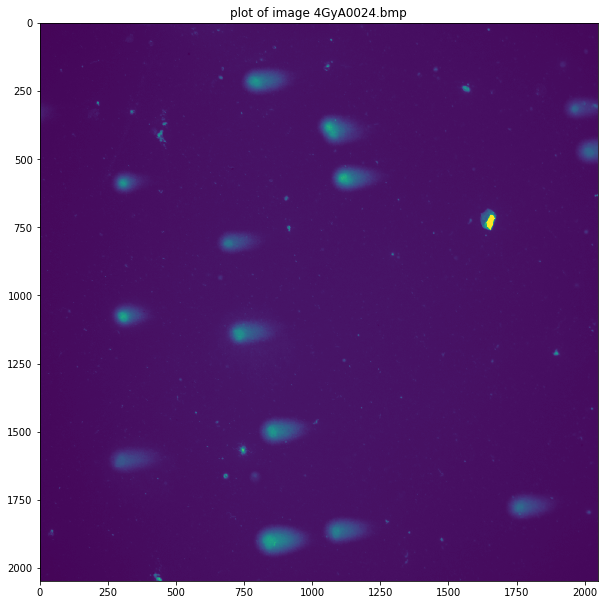

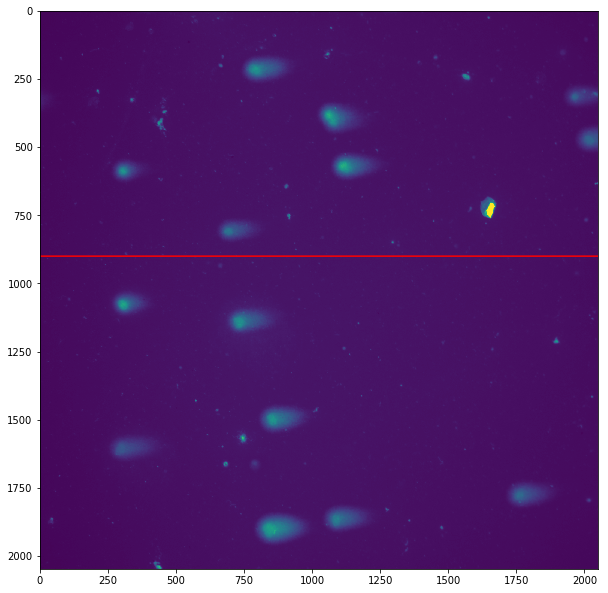

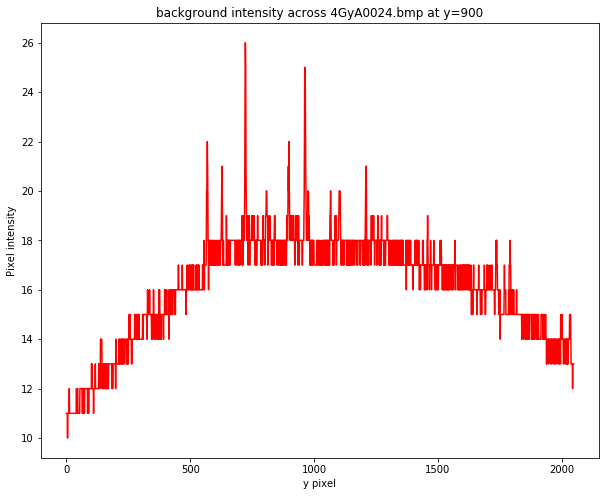

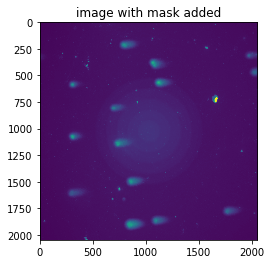

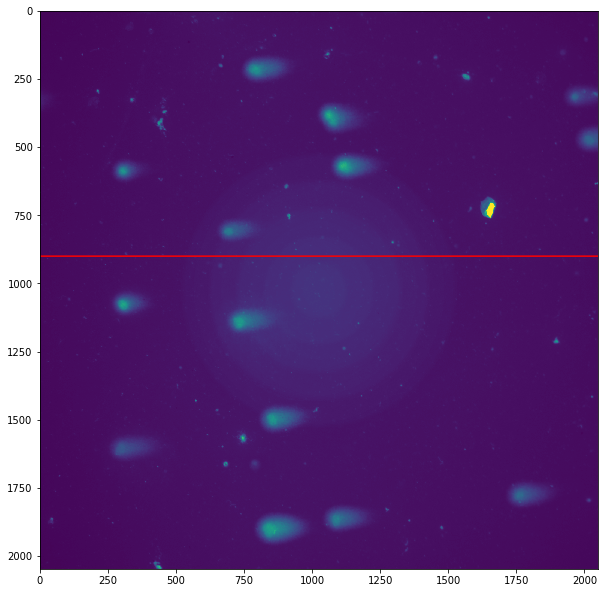

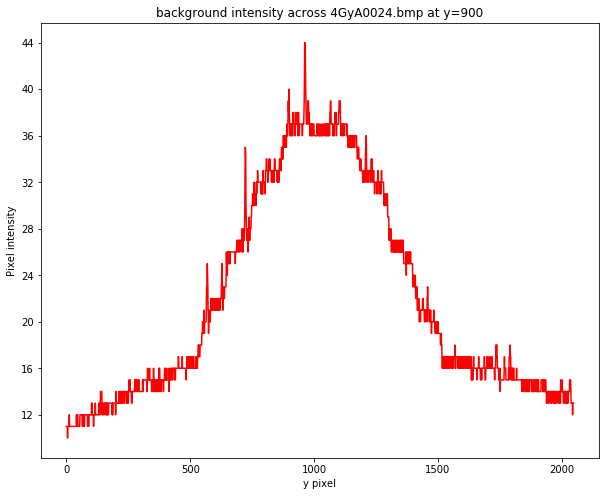

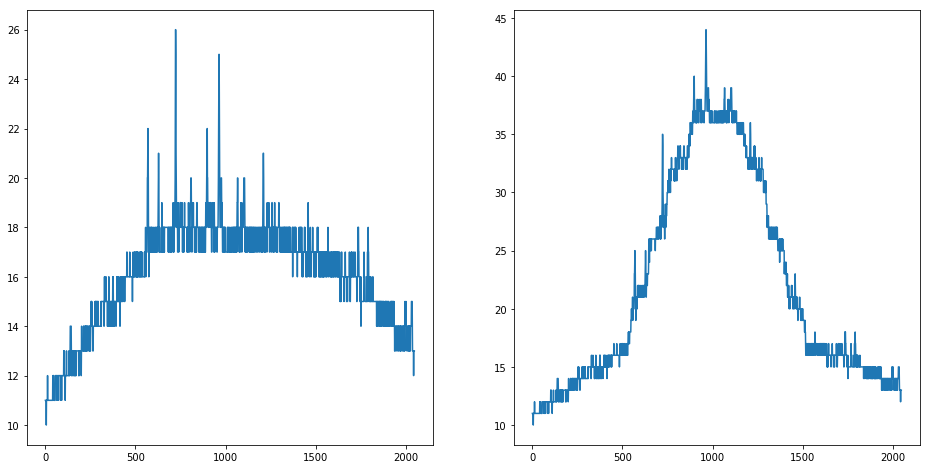

In [10]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import glob
import os
import sys
import cv2
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import processing_defs as process
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0024.bmp"
#imFile = "../CometImages/4Gy/4Gy 0h-4irrad.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
fileNameSplit = os.path.splitext(fileName)  #without extension
print(fileNameSplit)
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
#
#print("analysing image ", fileList[n])
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates    
nCols = imgRaw.shape[1] # x ccordinates
maxPix = np.amax(imgRaw)
print("image shape, rows and cols are: ", nRows, nCols)
#
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
#
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = process.rgba2rgb(imgRaw)
    imgGrey = process.rgb2grey(imgRGB, 1)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = process.rgb2grey(imgRGB, 1)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgGrey[:, :]
#
thresh = [10, 40]
nThresh = len(thresh)
imgThr = np.zeros((nRows, nCols, nThresh))
imgThr[:, :, 0] = imgArr > thresh[0]
imgThr[:, :, 1] = imgArr > thresh[1]
#
fig = plt.figure(figsize = (10,12))
plt.title("plot of image " + str(fileName))
plt.imshow(imgArr)
plt.show()
#
#plot line through middle to see intesnity
coord = 900
x_profile_before, y_profile_before = bckgd_profile(coord, imgArr, fileName, x = False)

#create a background filter to add cirle of varying intesnity to background
radRow = nRows/2
radCol = nCols/2
y, x = np.ogrid[-radRow: radRow, -radCol: radCol]
radius = [100, 200, 300, 400, 500]
nRad = len(radius)
aggMask = x**2 + y**2 <= radius[0] **2
aggMask = aggMask * 5
for n in range(1, nRad):
    mask = x**2 + y**2 <= radius[n] **2
    mask = 5 * mask
    aggMask += mask

aggMask = gaussian_filter(aggMask, sigma=10)
# convolve the img Arr with the mask
#imgBkg = convolve(imgArr, mask) #-sum(sum(mask)) +1
imgBkg = imgArr + aggMask
fig = plt.title("image with mask added")
plt.imshow(imgBkg)
plt.show()
plt.imsave(str(fileNameSplit[0]) + ".png", imgBkg, format="png") 
           #vmin=5, vmax=255)
#
#plot same line through convolved image to see if background is different
x_profile_after, y_profile_after = bckgd_profile(coord, imgBkg, fileName, x = False)

#
#plot histograms side by sde to compare 
fig = plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.plot(x_profile_before, y_profile_before)
plt.subplot(1, 2, 2)
plt.plot(x_profile_after, y_profile_after)
plt.show()